#  <center>Analysis of World Happiness Report 2017</center>
# <center>Factors That Keep Citizens Happy</center>

The World Happiness Report is an annual publication from United Nations Sustainable Developemnt Netwirk Solutions. As the title suggests, it ranks the countries of the world in the basis of their happiness. Respondents are asked to rate their own lives on a scaale of 0 to 10, 0 being the lowest and 10 being the highest. There are 6 metrics to capture their happiness, namely
* GDP per capita
* Social support
* Life expectancy
* Freedom
* Generosity
* Trust in Government
These metrics are used to estimate how much each of them contribute to the overall happiness in each country.

Let's get to the dataset now.

## Chapter 1: Reading the Dataset

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now we store the datasets into a dataframe of our own
with open("2017.csv") as report:
    report_df = pd.read_csv(report) 
with open("country_profile_variables.csv") as country:
  country_df = pd.read_csv(country)

We have 2 datasets. The first one is the World Happiness Report. The second one is a dataset containing various metrics like the GDP of a country, sex ratio, etc. I hope to describe some of the contributors of happiness with these metrics.

In [3]:
display(report_df) 
display(country_df)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,...,9.0,89,41.6,~0.0/1.6,-99,26,-99,-99,-99,-99
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,-99,-99,-99.0,-99,...,-99,49,2.7,-99,-99,-99,-99,-99,-99,-99
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,...,25.1,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,...,21.0,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99


From a first glance, we see that many numeric values are written as ..., -99, etc. These are bad values and we need to handle them.

Note : The word *Family* is used her instead of the *social suport* metric. For the sake of convinence, we're gonna let ot stay that way

# Chapter 2: Data Cleaning and Preparation

## Preparation

### 1. Happiness Report

In [4]:
print("The dataset has {} rows and {} columns".format(report_df.shape[0], report_df.shape[1]))

The dataset has 155 rows and 12 columns


In [5]:
report_df.columns # The metrics in the happiness report

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

Most of the column names are self explanatory.
Let's explain the ones that aren't
* Whisker high and Whisker low - Boxplots are used to visualise data along with the extent of outliers present. The upper whisker of the box plot is the largest dataset number smaller than 1.5IQR above the third quartile and the lower whisker of the box plot is the smallest dataset number larger than 1.5IQR below the first quartile
* Family (Social support) - is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
* Freedom - Freedom to make choices
* Generosity - Respondents were asked if they've donated to a charity in the past month. Generosity is the residual of regressing national average of response to this question.
* Trust Government corruption - The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government. The overall perception is just the average of the two 0-or-1 responses.
* Dystopia Residual - The score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

In [6]:
report_df.columns = report_df.columns.str.replace("."," ");

<ipython-input-6-4841e1dd2ba4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  report_df.columns = report_df.columns.str.replace("."," ");


In [7]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Whisker high                   155 non-null    float64
 4   Whisker low                    155 non-null    float64
 5   Economy  GDP per Capita        155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health  Life Expectancy        155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust  Government Corruption   155 non-null    float64
 11  Dystopia Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

There are no null values in any of the columns. Good dataset (pats on the back)

Now lets try to get a summary of the data

In [8]:
report_df.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,Dystopia Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


* The count of each column is same. i.e. 155. That's the number of countries from which data was collected.
* On an average, *FAMILY (SOCIAL SUPPORT)* seems to contribute the most to happiness, followed closely by GDP per capita

### 2. Country Variables

In [9]:
print("This dataset has {} rows and {} columns".format(country_df.shape[0], country_df.shape[1]))

This dataset has 229 rows and 50 columns


In [10]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

This dataset is very comprehensive, with a total of 50 metrics. We will be working only a handful of them, and it's best if we remove the others. So let's select the ones we need

In [11]:
sel_cols = ['country', 'Region', 'Surface area (km2)',
            'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
      'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
      'Food production index (2004-2006=100)',
       'Fertility rate, total (live births per woman)',
       'Life expectancy at birth (females/males, years)',
       'Population age distribution (0-14 / 60+ years, %)',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Health: Physicians (per 1000 pop.)',
       'Education: Government expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Pop. using improved drinking water (urban/rural, %)',
       'Pop. using improved sanitation facilities (urban/rural, %)'
       ]

country_df_backup = country_df.copy() # Keeping a backup
country_df = country_df[sel_cols] # Trimming the dataframe

It might be a good idea to look at the entire DataFrame once, just to get an idea about all the types of values present 

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Displayong the entire DataFrame
    print(country_df) 

                                       country             Region  \
0                                  Afghanistan       SouthernAsia   
1                                      Albania     SouthernEurope   
2                                      Algeria     NorthernAfrica   
3                               American Samoa          Polynesia   
4                                      Andorra     SouthernEurope   
5                                       Angola       MiddleAfrica   
6                                     Anguilla          Caribbean   
7                          Antigua and Barbuda          Caribbean   
8                                    Argentina       SouthAmerica   
9                                      Armenia        WesternAsia   
10                                       Aruba          Caribbean   
11                                   Australia            Oceania   
12                                     Austria      WesternEurope   
13                                

As we can see, there are lot of columns have too may bad values. Bad values mean those like -99, ... , ~ and null. So first, we'll convert all of them to null, check which columns have more than 20% null values, and then we'll frop those. We'll also be removing the rows with bad values.
Another interesting observation was that many of the metrics (like labour force participation for males and females) were put into the same coloumn, despote them being 2 seperate values and not their average. Very often, one of those values was a bad value too. So we need to fix that, by seperating the metric values that have been grouped like that.

In [13]:
# Labour Force
country_df["Labour force participation (female %)"] = country_df[country_df['Labour force participation (female/male pop. %)'].str.contains("/")]['Labour force participation (female/male pop. %)'].apply(lambda x: x.split("/")[0]);
country_df["Labour force participation (male %)"] = country_df[country_df['Labour force participation (female/male pop. %)'].str.contains("/")]['Labour force participation (female/male pop. %)'].apply(lambda x: x.split("/")[1]);

# Life Expectancy
country_df["Life Expectancy (female %)"] = country_df[country_df["Life expectancy at birth (females/males, years)"].str.contains("/")]["Life expectancy at birth (females/males, years)"].apply(lambda x: x.split("/")[0]);
country_df["Life Expectancy (male %)"] = country_df[country_df["Life expectancy at birth (females/males, years)"].str.contains("/")]["Life expectancy at birth (females/males, years)"].apply(lambda x: x.split("/")[1]);

# Population age distribution
country_df["Population age distribution (0-14 %)"] = country_df[country_df["Population age distribution (0-14 / 60+ years, %)"].str.contains("/")]["Population age distribution (0-14 / 60+ years, %)"].apply(lambda x: x.split("/")[0])
country_df["Population age distribution (60+ years %)"] = country_df[country_df["Population age distribution (0-14 / 60+ years, %)"].str.contains("/")]["Population age distribution (0-14 / 60+ years, %)"].apply(lambda x: x.split("/")[1])

# Removing the original columns with grouped data
remove_cols = ["Labour force participation (female/male pop. %)", "Life expectancy at birth (females/males, years)",  "Population age distribution (0-14 / 60+ years, %)", "Pop. using improved drinking water (urban/rural, %)"]
country_df.drop(columns=remove_cols, inplace = True)


We'll be merging the DataFrames on the *Country* column, so their cases shoud be same.

In [14]:
# Renaming
country_df.rename(columns={"country":"Country"},inplace=True)
country_df.rename(columns={ 'Pop. using improved sanitation facilities (urban/rural, %)':'Pop. using improved sanitation facilities %'}, inplace=True)

# Merging
country_report = report_df.merge(country_df, how = "left", on= "Country")
display(country_report)

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,...,Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Seats held by women in national parliaments %,Pop. using improved sanitation facilities %,Labour force participation (female %),Labour force participation (male %),Life Expectancy (female %),Life Expectancy (male %),Population age distribution (0-14 %),Population age distribution (60+ years %)
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,4.4,7.4,39.6,-99,61.1,68.3,83.6,79.5,17.8,22.3
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,3.6,8.6,37.4,-99,58.1,66.0,82.2,78.1,16.5,25.3
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,3.8,7.8,47.6,-99,70.3,77.2,83.8,80.6,20.1,20.1
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,4.1,5.1,32.5,-99,62.5,74.5,84.8,80.5,14.9,24.1
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,3.0,7.2,42.0,-99,54.5,61.7,83.7,77.7,16.4,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,...,...,3.6,61.3,13.67,86.1,83.3,67.1,63.1,40.1,4.9
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,...,...,5.4,36.4,11.91,84.6,82.7,58.0,54.2,45.0,4.4


In [15]:
country_report["Region"].unique()

array(['NorthernEurope', 'WesternEurope', 'NorthernAmerica', 'Oceania',
       'WesternAsia', 'CentralAmerica', nan, 'SouthAmerica',
       'South-easternAsia', 'SouthernEurope', 'Caribbean',
       'EasternEurope', 'CentralAsia', 'EasternAsia', 'NorthernAfrica',
       'EasternAfrica', 'SouthernAsia', 'WesternAfrica', 'SouthernAfrica',
       'MiddleAfrica'], dtype=object)

We probably can work with a broader idea of the regions. Therefore, lets clump them up into their respective continents

In [16]:
# Defining the groups
Regions = {"Asia" : ['SouthernAsia', 'WesternAsia', 'South-easternAsia', 'CentralAsia', "EasternAsia" ],
"Oceania" : ['Polynesia', 'Oceania', 'Melanesia', 'Micronesia'],
"Europe" : ['SouthernEurope',  'WesternEurope', 'EasternEurope', 'NorthernEurope'],
"Africa" : ['NorthernAfrica', 'MiddleAfrica', 'WesternAfrica', 'SouthernAfrica', 'EasternAfrica'],
"NorthernAmerica" : ["NorthernAmerica",'CentralAmerica','Caribbean']}

# Running a loop to group them
country_report.set_index("Country", inplace=True) # Setting the country name as index so that it's easier to search
for i in Regions.keys():
    country_report.replace(Regions[i], i, inplace = True)

## Cleaning

Earlier, we noticed the different datatypes in the dataset, and many of the numerical ones were set to `object` datatype. That might cause problems at the time of performing numerical operations, and so it's best to convert them to `float`

In [17]:
country_report.select_dtypes(include="object").columns

Index(['Region', 'Surface area (km2)', 'Unemployment (% of labour force)',
       'Fertility rate, total (live births per woman)',
       'Infant mortality rate (per 1000 live births',
       'Health: Physicians (per 1000 pop.)',
       'Education: Government expenditure (% of GDP)',
       'Pop. using improved sanitation facilities %',
       'Labour force participation (female %)',
       'Labour force participation (male %)', 'Life Expectancy (female %)',
       'Life Expectancy (male %)', 'Population age distribution (0-14 %)',
       'Population age distribution (60+ years %)'],
      dtype='object')

In [18]:
cols = list(country_report.select_dtypes("object").columns)
del cols[0] # The region column cannot be converted to numeric

for i in cols:
  country_report[i] = pd.to_numeric(country_report[i], errors="coerce") # bad values that can't be converted to float will be converted to NaN

In [19]:
country_report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Happiness Rank                                     155 non-null    int64  
 1   Happiness Score                                    155 non-null    float64
 2   Whisker high                                       155 non-null    float64
 3   Whisker low                                        155 non-null    float64
 4   Economy  GDP per Capita                            155 non-null    float64
 5   Family                                             155 non-null    float64
 6   Health  Life Expectancy                            155 non-null    float64
 7   Freedom                                            155 non-null    float64
 8   Generosity                                         155 non-null    fl

The ` ~~ ` and `...` have been converted to `NaNs`, but the `-99s` are also bad values, and we need to take care of them

In [20]:
country_report.replace("-99", np.nan, inplace=True)
country_report.replace("-99.0", np.nan, inplace=True)

Every column must have some `NaN` values. If the percentage is too high though, we need to discard them. More than 15% seems to be reasonable limit for that

In [21]:
per_nan = country_report.isna().sum()/len(country_df)*100 # checking percentage of NaN

# Dropping those columns
for i in country_report.columns:
    if per_nan[i]>=15 :
        print("\n The column - " + i + ", with {0:.2f}% of NaN values has been removed".format(per_nan[i]) )
        country_report.drop(i, axis = 1, inplace=True)



 The column - Health: Physicians (per 1000 pop.), with 25.76% of NaN values has been removed

 The column - Education: Government expenditure (% of GDP), with 16.16% of NaN values has been removed


### Handling missing values

On this dataset, missing values can't really be handled. Because for each country, each metric is different. It can even differ from the neighbouring countries in the same region. If this was a time-series data, then predictions could've been made from the recent trends.

Therefore, our cleaning and preparation is done. 

## Chapter 3: Exploratory Data Analysis

First, we'll draw a correlation matrix to get an idea about the relationship between the various metrics in the happiness report.

In [22]:
report_heat = report_df.drop(columns=["Whisker high", "Whisker low"], axis = 1)

In [23]:
report_heat.corr(method= "pearson") # Using pearson correlation coeffieient

,Happiness Rank,Happiness Score,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,Dystopia Residual
Happiness Rank,1.000000,-0.992774,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness Score,-0.992774,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Economy GDP per Capita,-0.813244,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health Life Expectancy,-0.780716,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust Government Corruption,-0.405842,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia Residual,-0.484506,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


In [24]:
report_heat.corr(method= "spearman") # Using spearman correlation coefficient because the data might not be normally distributed

,Happiness Rank,Happiness Score,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,Dystopia Residual
Happiness Rank,1.000000,-0.999997,-0.825213,-0.773649,-0.788002,-0.556282,-0.136331,-0.301237,-0.503229
Happiness Score,-0.999997,1.000000,0.824992,0.773619,0.787647,0.556133,0.136443,0.300966,0.503556
Economy GDP per Capita,-0.825213,0.824992,1.000000,0.711866,0.856650,0.406784,0.014544,0.245625,0.085904
Family,-0.773649,0.773619,0.711866,1.000000,0.631133,0.477790,0.081003,0.202904,0.145384
Health Life Expectancy,-0.788002,0.787647,0.856650,0.631133,1.000000,0.356579,0.075827,0.175660,0.112900
Freedom,-0.556282,0.556133,0.406784,0.477790,0.356579,1.000000,0.349625,0.473072,0.093793
Generosity,-0.136331,0.136443,0.014544,0.081003,0.075827,0.349625,1.000000,0.230818,-0.027579
Trust Government Corruption,-0.301237,0.300966,0.245625,0.202904,0.175660,0.473072,0.230818,1.000000,0.038400
Dystopia Residual,-0.503229,0.503556,0.085904,0.145384,0.112900,0.093793,-0.027579,0.038400,1.000000


As we can see, there's a very little difference between the 2 coefficients. So it's confirmed that there is more or less a linear relationship between the metrics.

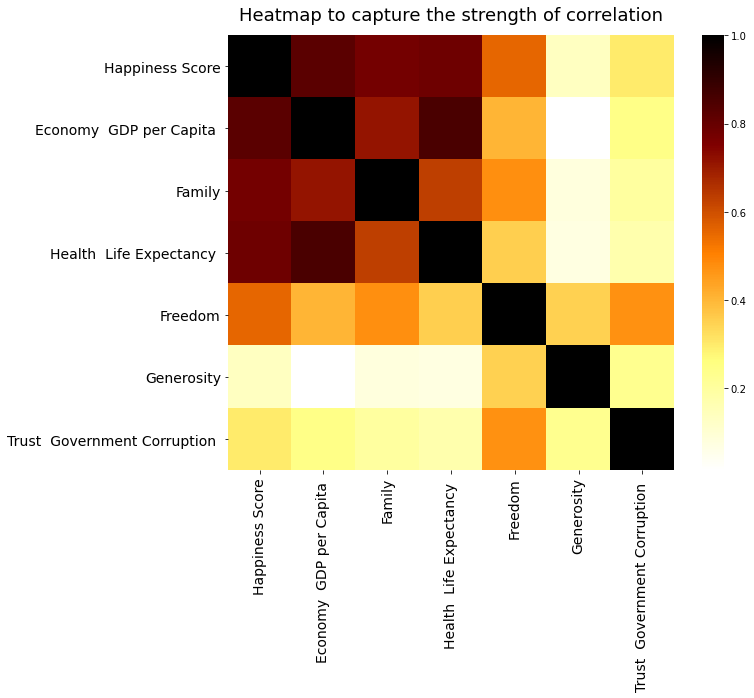

In [25]:
plt.figure(figsize=(10,8))
plt.title("Heatmap to capture the strength of correlation", fontsize =18, pad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(report_heat.drop(columns=["Dystopia Residual","Happiness Rank"], axis=1).corr(method="spearman"), cmap= "afmhot_r");

So now we have an idea about the correlation between each metric. Some observations from this heatmap, that I'm gonna explore further are :
* GDP per capita has the highest correlation with Happiness score and all the other metrics, except generosity
* Family(Social Support) also plays a vital role in the happiness score
* Generosity doesn't seem to be strongly correlated to any of the factors
* Freedom is more strongly correlated to social support and trust in government, than any other factors


#### GDP per capita and Happiness Score

In [26]:
country_report.sort_values(by="Happiness Score", ascending=False).head(10)

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption,...,Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Pop. using improved sanitation facilities %,Labour force participation (female %),Labour force participation (male %),Life Expectancy (female %),Life Expectancy (male %),Population age distribution (0-14 %),Population age distribution (60+ years %)
Country,,,,,,,,,,,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,...,2.4,9.7,39.6,-99.0,61.1,68.3,83.6,79.5,17.8,22.3
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,...,3.5,10.8,37.4,-99.0,58.1,66.0,82.2,78.1,16.5,25.3
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,...,1.6,8.9,47.6,-99.0,70.3,77.2,83.8,80.6,20.1,20.1
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,...,3.9,11.7,32.5,-99.0,62.5,74.5,84.8,80.5,14.9,24.1
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,...,2.3,9.7,42.0,-99.0,54.5,61.7,83.7,77.7,16.4,27.8
Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,...,3.5,10.9,38.0,-99.0,57.3,69.7,83.1,79.4,16.4,25.0
Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,...,4.7,10.4,26.3,-99.0,60.7,69.9,83.8,79.7,16.0,23.5
New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,...,4.4,11.0,34.2,-99.0,62.1,72.8,83.1,79.5,19.8,20.8
Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,...,3.9,9.4,28.7,-99.0,58.4,70.7,84.4,80.2,19.0,21.0


These are the stats of the top 10 happiest countries in the world. Let's see if the top 10 countries with the highest GDP per capita make it to the happiest countries of the world, since that's what has the most weightage aparently.

For that, we'll create a function and it can be used in other sections as well.

In [27]:
country_report['Economy  GDP per Capita '].sort_values(ascending=False).head(10)

Country
Qatar                      1.870766
Luxembourg                 1.741944
Singapore                  1.692278
Kuwait                     1.632952
United Arab Emirates       1.626343
Norway                     1.616463
Switzerland                1.564980
Hong Kong S.A.R., China    1.551675
United States              1.546259
Ireland                    1.535707
Name: Economy  GDP per Capita , dtype: float64

In [28]:
# Function to check if there is any country that's common in both the "Top happiest countries" and the top of a specific metric
def top_check(df, parameter, t):
    tops = []
    tops_true = {"Country": [],"Region":[], "Happiness Score": [], "Happiness Rank":[],parameter:[],"Parameter Rank": []} #countries that make it to the top
    tops_false = {"Country": [], "Region":[], "Happiness Score": [], "Happiness Rank":[],parameter:[],"Parameter Rank": []}#countries that don't make it to the top
    most_gen = df[parameter].sort_values(ascending=False).head(t)
    tops_cons = most_gen.index

    # Creating a list of the top most countries with a given metric
    for i in tops_cons:
        tops.append(i)

    # List of happiest countries in the world
    x = list(df.index)
    y = x[:t]

    # Creating a dataframe with the common countries
    for p, j in enumerate(tops):
        if j in y:
            tops_true["Country"].append(j)
            tops_true["Region"].append(df.at[j,"Region"])
            tops_true["Happiness Score"].append(df.at[j,"Happiness Score"])
            tops_true["Happiness Rank"].append(df.at[j,"Happiness Rank"])
            tops_true[parameter].append(df.at[j,parameter])
            tops_true["Parameter Rank"].append(p+1)
        else:
            tops_false["Country"].append(j)
            tops_false["Region"].append(df.at[j,"Region"])
            tops_false["Happiness Score"].append(df.at[j,"Happiness Score"])
            tops_false["Happiness Rank"].append(df.at[j,"Happiness Rank"])
            tops_false[parameter].append(df.at[j,parameter])
            tops_false["Parameter Rank"].append(p+1)

    return(pd.DataFrame(tops_true), pd.DataFrame(tops_false))
        

In [29]:
top_gdp , no_top_gdp = top_check(country_report, 'Economy  GDP per Capita ',20)
print("These are the among the top 20 countries in which GDP per capita contributes the most to happiness,\nand that also in the top 20 happiest country country overall")
display(top_gdp)
print("These are the among the top countries where GDP contributes the most to their happiness,\nbut the country overall doesn't make it to the top 20 happiest countries")
display(no_top_gdp)

These are the among the top 20 countries in which GDP per capita contributes the most to happiness,
and that also in the top 20 happiest country country overall


,Country,Region,Happiness Score,Happiness Rank,Economy GDP per Capita,Parameter Rank
0,Luxembourg,Europe,6.863,18,1.741944,2
1,Norway,Europe,7.537,1,1.616463,6
2,Switzerland,Europe,7.494,4,1.564980,7
3,United States,NaN,6.993,14,1.546259,9
4,Ireland,Europe,6.977,15,1.535707,10
5,Netherlands,Europe,7.377,6,1.503945,12
6,Sweden,Europe,7.284,9,1.494387,13
7,Germany,Europe,6.951,16,1.487923,15
8,Austria,Europe,7.006,13,1.487097,16
9,Australia,Oceania,7.284,10,1.484415,17


These are the among the top countries where GDP contributes the most to their happiness,
but the country overall doesn't make it to the top 20 happiest countries


,Country,Region,Happiness Score,Happiness Rank,Economy GDP per Capita,Parameter Rank
0,Qatar,Asia,6.375,35,1.870766,1
1,Singapore,Asia,6.572,26,1.692278,3
2,Kuwait,Asia,6.105,39,1.632952,4
3,United Arab Emirates,Asia,6.648,21,1.626343,5
4,"Hong Kong S.A.R., China",NaN,5.472,71,1.551675,8
5,Saudi Arabia,Asia,6.344,37,1.530624,11
6,Bahrain,Asia,6.087,41,1.488412,14


*Parameter Rank refers to the ranks of the country when they're ranked based on the particular parameter, and not their overall happiness*

As we can see, 12 out of the 20 countries are at the top. Their happiness rank and their paramater rank are both high.
However, the countries that don't make it are the ones that have a high parameter rank. Surprisingly though, their happiness ranks are low. This might indicate that whatever happiness they have, is due to the their high GDP per capita. The other metrics don't contribute much to their happiness.

However, with an increasing GDP per capita, one might expect other features, like freedom to make choices and generosity to go up too. 
To inspect this abnormal behvaiour, we must investigate the other factors in the dataset.

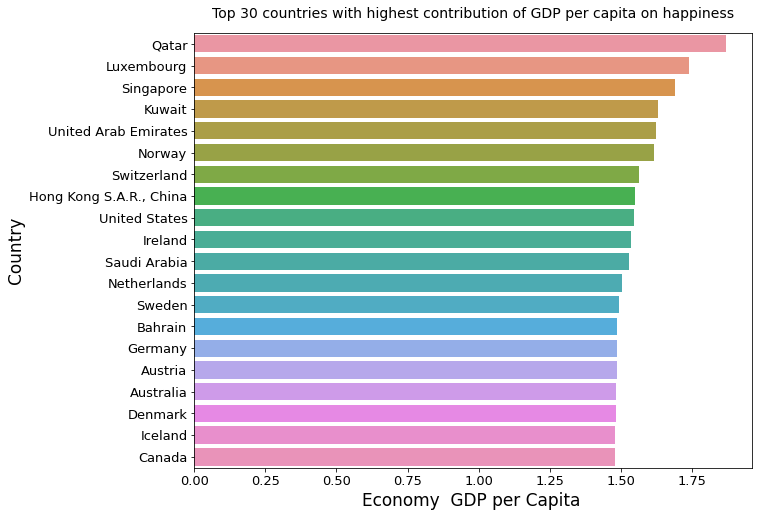

In [30]:
x1 = country_report["Economy  GDP per Capita "].dropna().sort_values(ascending=False).head(20)
y1= country_report.dropna()["Health: Total expenditure (% of GDP)"]
plt.figure(figsize=[10,8])
plt.yticks(fontsize=13)
plt.xticks(fontsize= 13)
plt.title("Top 30 countries with highest contribution of GDP per capita on happiness", fontsize = 14, pad=15)
plt.xlabel(xlabel="GDP per capita's contribution in happiness score", fontsize=17)
plt.ylabel(ylabel = "Country", fontsize=17)
sns.barplot(y=x1.index, x=x1);


Earlier, we discovered that the countries whose main ontributor to happiness was GDP per capita, their overall ranks were not so great. Now it's time we dig a little deeper into that

In [31]:
happy_gdp = country_report[['Happiness Rank', 'Happiness Score',"Region" , 'Economy  GDP per Capita ','GDP: Gross domestic product (million current US$)','Unemployment (% of labour force)', 'Labour force participation (female %)',
'Labour force participation (male %)']].sort_values(by='Economy  GDP per Capita ',ascending=False).head(20)
display(happy_gdp)

,Happiness Rank,Happiness Score,Region,Economy GDP per Capita,GDP: Gross domestic product (million current US$),Unemployment (% of labour force),Labour force participation (female %),Labour force participation (male %)
Country,,,,,,,,
Qatar,35,6.375,Asia,1.870766,164641.0,0.3,53.1,93.6
Luxembourg,18,6.863,Europe,1.741944,56802.0,5.6,52.0,65.5
Singapore,26,6.572,Asia,1.692278,292734.0,2.0,57.8,76.1
Kuwait,39,6.105,Asia,1.632952,114054.0,2.2,47.7,83.6
United Arab Emirates,21,6.648,Asia,1.626343,370296.0,3.7,41.7,90.8
Norway,1,7.537,Europe,1.616463,386578.0,5.1,61.1,68.3
Switzerland,4,7.494,Europe,1.564980,670790.0,4.6,62.5,74.5
"Hong Kong S.A.R., China",71,5.472,NaN,1.551675,NaN,NaN,NaN,NaN
United States,14,6.993,NaN,1.546259,NaN,NaN,NaN,NaN


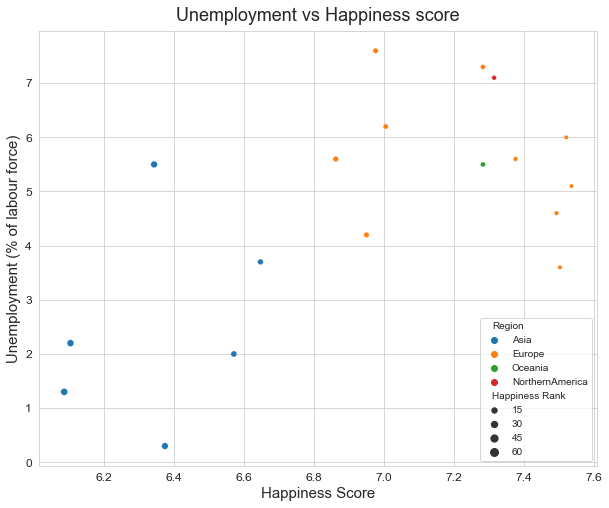

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize= 12)
plt.xlabel(xlabel = "Happiness Score",fontsize = 15)
plt.ylabel(ylabel= "Unemployment (% of labour force)", fontsize= 15)
plt.title("Unemployment vs Happiness score", fontsize = 18, pad=10)
sns.scatterplot(x= 'Happiness Score', y ='Unemployment (% of labour force)', hue="Region", size="Happiness Rank", data=happy_gdp );

We can see that in those countries, even with a higher unemployement rate, happiness score is on the higher side(on an average).
However, all the 6 Asian countries have lower happiness scores, no matter what their unemployement rate is. Their unemployement rate is lower as compared to the other continents in the top ranks as well. From that, we can conclude that even in the top Asian countries were GDP is a major part of happiness, people are not satisfied with their employment. That might indicate a poor work life.

In the European countries on the other hand, people are on the happier side even with higher rates of unemployemnt (compared to their Asian counterparts). This indicates that their overall quality of life is better. The bubble sizes show that they rank higher in the overall happiness scale too. These are the **Nordic countires**. We'll revisit them and try to figure out the reason behinf their happiness at the end.

#### Happiness Score and Life Expectancy

In [33]:
report_df['Health  Life Expectancy '].corr(report_df["Happiness Score"])

0.7819506247990085

As expected, life expectancy is a big contributor to a country's happiness. As social animals, our loved ones are very important to us and no amount of money or freedom can replace that. Maybe that's the reason even social support is so strongly correlated to happiness.

Life expectancy itslef is tied up to many other factors, like how much of their of their GDP does a country allocate to health, how much of that expenditure is actually useful in curbing infant mortality rate, etc. Our hypothesis is this : *With an increasingg health expenditure, life expectancy increases, and infant mortality rate decreases. All of this contributes to a higher happiness score*. First we'll do a broader, region wise overview and then dive into the specifics

In [34]:
#Checking for missing regions
country_report[country_report["Region"].isna()]["Region"]

Country
United States               NaN
Czech Republic              NaN
Taiwan Province of China    NaN
Russia                      NaN
South Korea                 NaN
Moldova                     NaN
Bolivia                     NaN
North Cyprus                NaN
Hong Kong S.A.R., China     NaN
Kosovo                      NaN
Venezuela                   NaN
Macedonia                   NaN
Vietnam                     NaN
Palestinian Territories     NaN
Iran                        NaN
Congo (Brazzaville)         NaN
Congo (Kinshasa)            NaN
Ivory Coast                 NaN
Syria                       NaN
Tanzania                    NaN
Name: Region, dtype: object

We could drop the rows with `null` region, but there are some pretty important ones. So, We'll manually assign them their correct values, and drop the rest.

In [35]:
country_report.at["United States", "Region"] = "NorthernAmerica"
country_report.at["Russia", "Region"] = "Asia"
country_report.at["Hong Kong S.A.R., China", "Region"] = "Asia"
country_report.at["Palestinian Territories", "Region"] = "Asia"
country_report.at["Iran", "Region"] = "Asia"
country_report.at["Syria", "Region"] = "Asia"

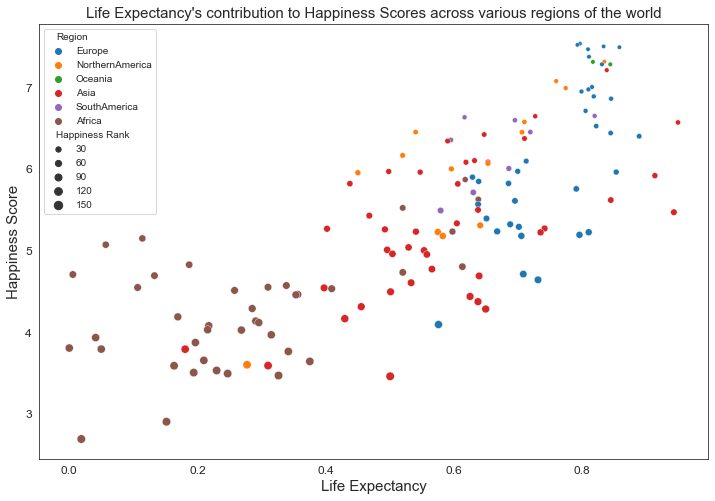

In [36]:
sns.set_style("white")
plt.figure(figsize=[12,8])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.title("Life Expectancy's contribution to Happiness Scores across various regions of the world", fontsize = 15)
sns.scatterplot(x= 'Health  Life Expectancy ', y = "Happiness Score", hue= "Region", data=country_report, size="Happiness Rank");

We can clearly see the clusters that've formed. The African cluster shows that life expectancy contributes very little to their happiness. Not only that, their overall happiness ranks are low too. European countries, on the other hand, have a very high correlation between the 2 factors. 

In [37]:
euro_life = country_report[country_report["Region"] == "Europe"][["Happiness Rank", "Happiness Score", 'Health  Life Expectancy ', "Infant mortality rate (per 1000 live births", 'Life Expectancy (female %)','Life Expectancy (male %)',"Health: Total expenditure (% of GDP)"]].sort_values(by="Infant mortality rate (per 1000 live births")
display(euro_life)

,Happiness Rank,Happiness Score,Health Life Expectancy,Infant mortality rate (per 1000 live births,Life Expectancy (female %),Life Expectancy (male %),Health: Total expenditure (% of GDP)
Country,,,,,,,
Iceland,3,7.504,0.833552,1.6,83.8,80.6,8.9
Finland,5,7.469,0.809158,2.3,83.7,77.7,9.7
Norway,1,7.537,0.796667,2.4,83.6,79.5,9.7
Sweden,9,7.284,0.830875,2.4,83.7,80.0,11.9
Slovenia,62,5.758,0.790828,2.5,83.2,77.2,9.2
Spain,34,6.403,0.888961,2.9,85.3,79.6,9.0
Portugal,89,5.195,0.795844,2.9,83.5,77.3,9.5
Italy,48,5.964,0.853144,3.0,84.7,79.9,9.2
Estonia,66,5.611,0.695168,3.2,81.2,71.8,6.4


It's evident that the the European countries alloctate a good part of their budget on healthcare, and that's the reason for their low infant mortality rates and high life expectanicies.

In [38]:
av_eu_im = country_report[country_report["Region"] == "Europe"]["Infant mortality rate (per 1000 live births"].sort_values().head(10).mean()
av_eu_le = (country_report[country_report["Region"] == "Europe"]['Life Expectancy (male %)'].sort_values().head(10).mean()+country_report[country_report["Region"] == "Europe"]['Life Expectancy (female %)'].sort_values().head(10).mean())/2
print("The average infant mortality rate in the top 10 European countries is " + str(round(av_eu_im)) + (" babies out of 1000"))
print("The average life expectancy in the top 10 European countries is " + str(av_eu_le) + (" years"))

The average infant mortality rate in the top 10 European countries is 3 babies out of 1000
The average life expectancy in the top 10 European countries is 74.08999999999999 years


These are really great stats. Earlier we saw that the African countries weren't doing so great in this matter. Let's look at those values and try to understand the difference

In [39]:
af_im = country_report[country_report.Region == "Africa"]["Infant mortality rate (per 1000 live births"].sort_values(ascending=False).head(10).mean()
print("The average infant mortality rate in the 10 worst performing African countries is {0:.2f} babies out of 1000".format(af_im))

The average infant mortality rate in the 10 worst performing African countries is 80.46 babies out of 1000


In [40]:
country_report[country_report.Region == "Africa"][["Happiness Score", "Infant mortality rate (per 1000 live births", 'Life Expectancy (female %)','Life Expectancy (male %)',"Health: Total expenditure (% of GDP)"]].drop(["Chad", "Somalia"]).sort_values(by="Infant mortality rate (per 1000 live births", ascending=False).head(10)

,Happiness Score,Infant mortality rate (per 1000 live births,Life Expectancy (female %),Life Expectancy (male %),Health: Total expenditure (% of GDP)
Country,,,,,
Sierra Leone,4.709,94.4,50.7,49.6,11.1
Central African Republic,2.693,93.5,51.0,47.8,4.2
Mali,4.190,78.5,56.9,55.6,7.0
Burundi,2.905,77.8,58.0,54.2,7.5
South Sudan,3.591,77.7,56.0,54.1,2.7
Nigeria,5.074,76.3,52.6,51.2,3.7
Mauritania,4.292,68.0,64.1,61.2,3.8
Benin,3.657,67.7,61.4,58.5,4.6
Cameroon,4.695,67.5,57.7,55.1,4.1


Every country on this list has a very low expenditure on healthcare, with the exceptions of Sierra Leone. Mozambique,  Mali and Burundi have standard percentages dedicated to healhcare, however, looking at their records, it should be more.

Sierra Leone is the African country with the highest infant mortality rate, presumably amongst the lowest 5 in the world. From their high expenditure on healthcare, it is evident that thy're trying to battle the infant mortality and maternal mortality rates, as well as their very low life expectancies. in 2010, the Government of Sierra Leone introduced the Free Healthcare Initiative (FHCI), making a package of basic healthcare services available for free to pregnant and lactating mothers and children under five

In [41]:
country_report.loc["Sierra Leone"]

Happiness Rank                                            106
Happiness Score                                         4.709
Whisker high                                         4.850643
Whisker low                                          4.567357
Economy  GDP per Capita                              0.368421
Family                                               0.984136
Health  Life Expectancy                              0.005565
Freedom                                              0.318698
Generosity                                           0.293041
Trust  Government Corruption                         0.071095
Dystopia Residual                                     2.66846
Region                                                 Africa
Surface area (km2)                                    72300.0
Population in thousands (2017)                         7557.0
Population density (per km2, 2017)                      104.7
Sex ratio (m per 100 f, 2017)                            98.1
GDP: Gro

The GDP of this country is very low. On top of that, only 22%  of their population is using improved sanitation facilities. This will inevitably give rise to many more problems. We see that on an average, a woman gives birth to 4.8 babies, which means that hardly all of them will get proper nutrition and healthcare facilities. This is a vicious cycle - parents opting to produce more children so that atleast a few of them can survive, which leads to neither of them getting proper nutrition, which leads to higher infant and maternal mortality rates, all of which comes back to parents placing a safe bet in producing more children

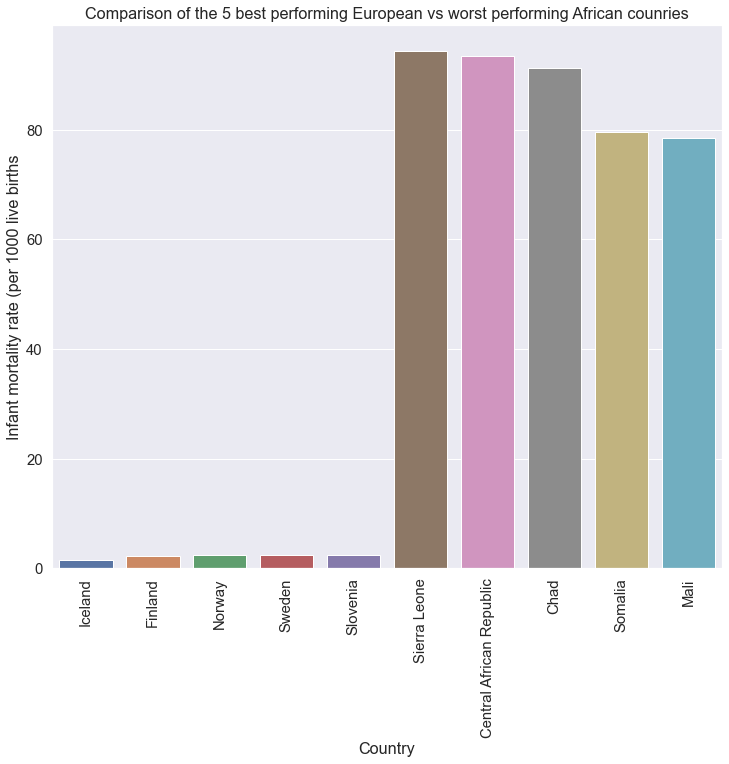

In [42]:
# Filtered datasets
best_eu = country_report[country_report["Region"] == "Europe"]["Infant mortality rate (per 1000 live births"].sort_values().head(5)
worst_af = country_report[country_report.Region == "Africa"]["Infant mortality rate (per 1000 live births"].sort_values(ascending=False).head(5)
best_worst = best_eu.append(worst_af)
# Seaborn plot
sns.set_style("white")
sns.set(font_scale = 1.35)
plt.figure(figsize=[12,10])
plt.title("Comparison of the 5 best performing European vs worst performing African counries")
plt.xticks(rotation = 90)
sns.barplot(x = best_worst.index, y = best_worst);

This visualisations enough to give us a clear idea of how terrifyingly huge the gap is between the healthcare systems

#### Happiness Score and Social Support

We saw earlier that family (Social Support) also had a strong correlation to happiness score. Thats the beauty of statistics. Something as abstract as feelings and emotions can be quantified into numbers to make sense. Social support having the strongest correlation with happiness is beautiful, because if not social animals, then what even are we? 
Whatever weightage any other metric might have, at the end of the day, humans want to share their happiness and sorrows alike, with the poeple they love. 

In [43]:
print("The average contribution of social support to happiness score is {:.2f}".format(report_df["Family"].mean()))
print("While maximum contribution of social support to happiness score is {0:.2f}".format(report_df["Family"].max()))
print("And 70% of the values lie above {0:.2f}".format(report_df["Family"].dropna().quantile(0.3)))

The average contribution of social support to happiness score is 1.19
While maximum contribution of social support to happiness score is 1.61
And 70% of the values lie above 1.12


Any metric in our dataset won't be able to properly justify these numbers. So we'll leave it here. But one thing is clear, that social support is a strong contributor to happiness, no matter how high or low the country ranks overall.

#### Freedom, Happiness and Trust in government

In [44]:
print(country_report["Freedom"].sort_values(ascending=False))

Country
Uzbekistan    0.658249
Norway        0.635423
Cambodia      0.633376
Iceland       0.627163
Denmark       0.626007
                ...   
Syria         0.081539
Burundi       0.059901
Haiti         0.030370
Sudan         0.014996
Angola        0.000000
Name: Freedom, Length: 155, dtype: float64


In [45]:
print(country_report["Trust  Government Corruption "].sort_values(ascending=False))

Country
Singapore                 0.464308
Rwanda                    0.455220
Qatar                     0.439299
Denmark                   0.400770
Sweden                    0.384399
                            ...   
Bulgaria                  0.011052
Moldova                   0.010091
Trinidad and Tobago       0.008965
Romania                   0.004388
Bosnia and Herzegovina    0.000000
Name: Trust  Government Corruption , Length: 155, dtype: float64


In [46]:
print("The correlation between Freedom and Trust in governmemt is {0:.2f}, which is kind of low.".format(country_report["Freedom"].corr(country_report["Trust  Government Corruption "], method="spearman")))
print("Let's try to capture this visually")

The correlation between Freedom and Trust in governmemt is 0.47, which is kind of low.
Let's try to capture this visually


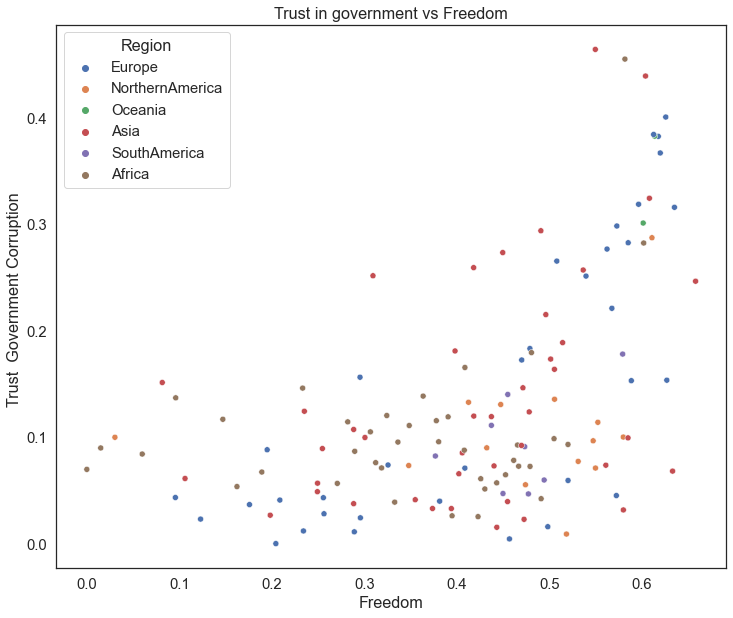

In [47]:
sns.set_style("white")
plt.figure(figsize=(12,10))
plt.title("Trust in government vs Freedom")
sns.scatterplot(x = country_report["Freedom"], y = country_report["Trust  Government Corruption "], hue = country_report["Region"]);

There are no visible clusters in this scatterplot. 
However, no matter how much freedom you enjoy, trust in government always seems to be on the lower side. Thats undertstandable, because when we elect someone to lead our country, we do it because they're fit to lead us, not because they make us happy. Secondly, government is a body that often operates in secrecy. All this, coupled with corruption, results in a low contibution in happiness score.

However, on the top right we can see some exceptional countries. Take note that freedom's contribution in these countries' happiness is very high

In [48]:
print("The average contibution of 'Trust in government' in happiness score is {0:.2f}".format(country_report["Trust  Government Corruption "].mean()))

The average contibution of 'Trust in government' in happiness score is 0.12


In [49]:
av = country_report["Trust  Government Corruption "].mean()
print("These are the top 15 countries with above average trust in government ")
display(country_report[country_report["Trust  Government Corruption "] > av][["Happiness Rank", "Happiness Score", "Trust  Government Corruption ", "Freedom" ]].sort_values(by = "Trust  Government Corruption ",ascending=False).head(15))

These are the top 15 countries with above average trust in government 


,Happiness Rank,Happiness Score,Trust Government Corruption,Freedom
Country,,,,
Singapore,26,6.572,0.464308,0.549841
Rwanda,151,3.471,0.455220,0.581844
Qatar,35,6.375,0.439299,0.604131
Denmark,2,7.522,0.400770,0.626007
Sweden,9,7.284,0.384399,0.612924
New Zealand,8,7.314,0.382817,0.614062
Finland,5,7.469,0.382612,0.617951
Switzerland,4,7.494,0.367007,0.620071
United Arab Emirates,21,6.648,0.324490,0.608345


Many of the Nordic countries are up there on the list along with some of the countries with the highest GDP per capita. These countries don't have very strignent intervention from their respective governments and enjoy a fair deal of freedom in making choices. So they're not surprising. 

However, the appearence of Rwanda (the 5th saddest country), and Hong Kong (A special administrative city of China), is surprising.
* Hong Kong enjoys a great deal of autonomy with it's own judiciary and executive. Although an administrative part of China, they are not subjected to the same kind of 
* I cannot answer why Freedom and trust in Government contribute so highly in Rwanda's happiness. This country regularly ranks low in all metrics like freedom of expression, government suppression of political dissent, etc.

#### Happiness and Generosity
At the beginning of this project, we saw that generosity had a very low correlation with all the other metrics, even happiness scores. It's time we try to figure out the reason behinf that. Let's begin by looking at some countries where donating makes people happy.

In [50]:
country_report[["Region", "Generosity", "Happiness Score"]].sort_values(by="Generosity", ascending=False).head(20)

,Region,Generosity,Happiness Score
Country,,,
Myanmar,Asia,0.838075,4.545
Indonesia,Asia,0.611705,5.262
Malta,Europe,0.574731,6.527
Thailand,Asia,0.572123,6.424
New Zealand,Oceania,0.500005,7.314
Syria,Asia,0.493664,3.462
United Kingdom,Europe,0.492774,6.714
Sri Lanka,Asia,0.490864,4.440
Haiti,NorthernAmerica,0.489204,3.603


In [51]:
gen = country_report[["Region", "Generosity", "Happiness Score"]].sort_values(by="Generosity", ascending=False).head(20)
gen_reg = gen.groupby("Region").count()
display(gen_reg)

,Generosity,Happiness Score
Region,,
Africa,1,1
Asia,10,10
Europe,5,5
NorthernAmerica,2,2
Oceania,2,2


Most of the countries that are the happiest to donate are from Asia. I'm wondering if the happiest countries in the world derive a major part of their happiness from generosity. 
To check that, we need to check if the countries on top of the generosity list also top in the overall hapiness list. We're gonna reuse the function that we created earlier to do that

In [52]:
happy_gen, n_happy_gen = top_check(country_report,"Generosity",20)
print("These countries make it to the top of both lists")
display(happy_gen)
print("These, however, don't make it to the top of the hapiness list")
display(n_happy_gen)

These countries make it to the top of both lists


,Country,Region,Happiness Score,Happiness Rank,Generosity,Parameter Rank
0,New Zealand,Oceania,7.314,8,0.500005,5
1,United Kingdom,Europe,6.714,19,0.492774,7
2,Australia,Oceania,7.284,10,0.477699,10
3,Iceland,Europe,7.504,3,0.475540,11
4,Netherlands,Europe,7.377,6,0.470490,13
5,Canada,NorthernAmerica,7.316,7,0.435540,15
6,Ireland,Europe,6.977,15,0.427858,17


These, however, don't make it to the top of the hapiness list


,Country,Region,Happiness Score,Happiness Rank,Generosity,Parameter Rank
0,Myanmar,Asia,4.545,114,0.838075,1
1,Indonesia,Asia,5.262,81,0.611705,2
2,Malta,Europe,6.527,27,0.574731,3
3,Thailand,Asia,6.424,32,0.572123,4
4,Syria,Asia,3.462,152,0.493664,6
5,Sri Lanka,Asia,4.440,120,0.490864,8
6,Haiti,NorthernAmerica,3.603,145,0.489204,9
7,Bhutan,Asia,5.011,97,0.474055,12
8,Kenya,Africa,4.553,112,0.444860,14
9,Kyrgyzstan,Asia,5.004,98,0.428580,16


In [53]:
print(happy_gen.groupby("Region").count())
print(n_happy_gen.groupby("Region").count())

                 Country  Happiness Score  Happiness Rank  Generosity  \
Region                                                                  
Europe                 4                4               4           4   
NorthernAmerica        1                1               1           1   
Oceania                2                2               2           2   

                 Parameter Rank  
Region                           
Europe                        4  
NorthernAmerica               1  
Oceania                       2  
                 Country  Happiness Score  Happiness Rank  Generosity  \
Region                                                                  
Africa                 1                1               1           1   
Asia                  10               10              10          10   
Europe                 1                1               1           1   
NorthernAmerica        1                1               1           1   

                 Paramete

We can see that the Asian countries, that were amongst the happiest to donate, do not make it to the list of the happiest countries overall. 
This tells us that these people might not be the happiest or the richest, but they don't shy away from my helping other people. And this is a wonderful quality to have. I don't have anything against the other continents, but being able to hapily put others before yourself is a noble act and that needs to be acknowledged.

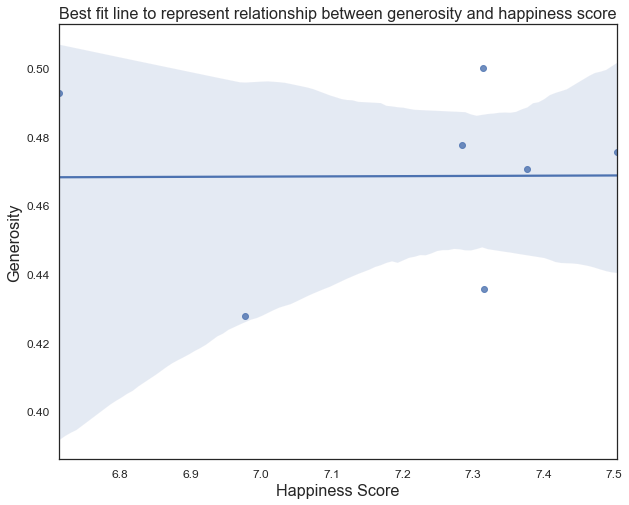

In [54]:
sns.set_style("white")
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Best fit line to represent relationship between generosity and happiness score")
sns.regplot(x = happy_gen["Happiness Score"], y = happy_gen["Generosity"]);



This is quite a surprisng revelation. There isn't a very strong correlation even in the only countires that are simultaneously both amongst the happiest countries in the world and the ones that derive pleasure from giving.

With that, we come to the end of the EDA section.

## Specific Cases

### Nordic countries
In an earlier section, we observed that some countries were common in every list that we formed. They were at the top of every metric of happiness. And these countries were from Europe. These are the Nordic countries and the reason behind their happiness is their ability to provide for their citizens, and by solving their problems. Lets look into some of them to better understand this

In [55]:
nordic = ["Denmark", "Finland", "Iceland","Norway","Sweden"]
country_report[country_report.index.isin(nordic)][['Population density (per km2, 2017)',
'Sex ratio (m per 100 f, 2017)',
'GDP: Gross domestic product (million current US$)',
'Unemployment (% of labour force)',
'Fertility rate, total (live births per woman)',
'Infant mortality rate (per 1000 live births',
'Health: Total expenditure (% of GDP)',
'Labour force participation (male %)', 'Life Expectancy (female %)']]

,"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),Unemployment (% of labour force),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Labour force participation (male %),Life Expectancy (female %)
Country,,,,,,,,,
Norway,14.5,101.8,386578.0,5.1,1.8,2.4,9.7,68.3,83.6
Denmark,135.1,99.0,301308.0,6.0,1.7,3.5,10.8,66.0,82.2
Iceland,3.3,100.7,16780.0,3.6,2.0,1.6,8.9,77.2,83.8
Finland,18.2,97.2,231960.0,8.9,1.8,2.3,9.7,61.7,83.7
Sweden,24.2,100.2,495694.0,7.3,1.9,2.4,11.9,68.0,83.7


Each and every value in this dataset is much better than their averages. One metric is correlated to another. For example, with lower uneployment rates, a person has more disposable income. They are able to afford a very healthy lifestyle for themselves and their children. Due to their low fertility and infant mortality rates, both the mother and child are healthy, which leads to higher life expectancies. All of this is done along with administrative policies that are highly beneficial for the citizens. Free healthcare, free education, proper prison laws and all the other policies ensure that crime rates are low and the overall quality of life is very high.

### Comaparison of India VS The World

India ranks pretty low on the happiness report (121). To understand how we're performing with respect to the rest of the world , we need to create a new dataframe where we'll store the data about India and the rest of the world's average.

In [56]:
comapre = {"Region": []}
cols = report_df.columns
cols = cols.drop("Country")
for i in cols:
    comapre[i] = []
comapre["Region"].append("World(including India)")
for i in cols:
    comapre[i].append(report_df[i].mean())
comapre["Region"].append("World(exclduing India)")
rep_wo_india = report_df[report_df["Country"] != "India"]
for i in cols:
    comapre[i].append(rep_wo_india[i].mean())
comapre["Region"].append("India")
ind = report_df[report_df["Country"] == "India"]
for i in cols:
    comapre[i].append(float(ind[i]))
compare_df = pd.DataFrame(comapre)
compare_df.drop(["Happiness Rank", "Whisker high", "Whisker low", "Dystopia Residual"], axis=1, inplace=True)
display(compare_df)

,Region,Happiness Score,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption
0,World(including India),5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
1,World(exclduing India),5.360766,0.985968,1.191719,0.551964,0.408389,0.246983,0.123321
2,India,4.315000,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227


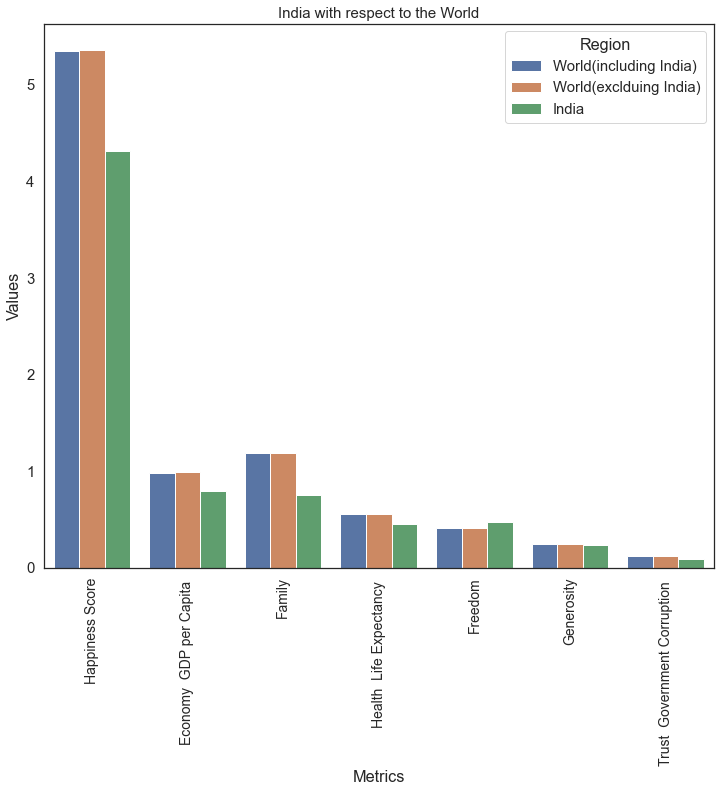

In [57]:
#New dataframe structure for the bar graph
compare_df = pd.melt(frame = compare_df, id_vars= "Region", var_name="Metrics", value_name="Values")

# Visualisation
sns.set_style("white")
plt.figure(figsize=(12,10))
plt.title("India with respect to the World", fontsize=15)
plt.xticks(fontsize= 14,rotation=90)
sns.barplot(x= compare_df["Metrics"] , y= compare_df["Values"], hue = compare_df["Region"]);

India seems to be performing below average in the happiness metrics, except for *Freedom to make choices*. Thats great, considering the fact that we're a democracy and our freedom fighters wanted us to have the freedom to make our own choices.

Nobel Laureate Rabindranath Tagore , who composed our National Anthem, in poem *Where the mind is without fear* said that

**<center>Where the mind is led forward by thee**

**<center>Into ever-widening thought and action**

**<center>Into that heaven of freedom, my Father, let my country awake.**

Now lets understand all the factors that contribute to India's happiness

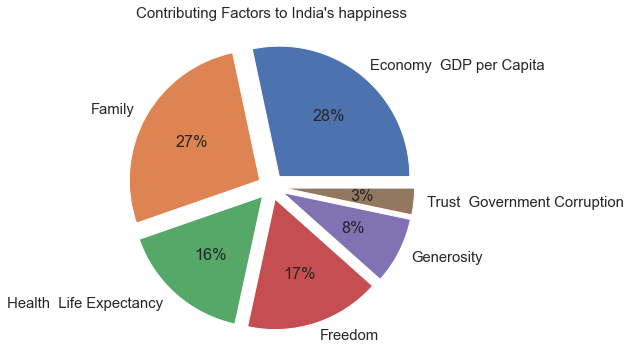

In [58]:
ind_vals = list(report_df.loc[121])
# Deleting the first 5 columns
del ind_vals[0:5]
# Deleting the last column 
ind_vals.pop()

# Creating labels to better understand the chart
labels = list(report_df.columns)
del labels[0:5]
labels.pop()
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)

plt.figure(figsize=(8,6))
plt.title("Contributing Factors to India's happiness", fontsize=15)
plt.pie(x= ind_vals, labels=labels, explode=explode, autopct='%1.0f%%');

Finally, we'll try to summarize the contribution of each factor into each of the 155 countries' hapiness using a stacked graph.

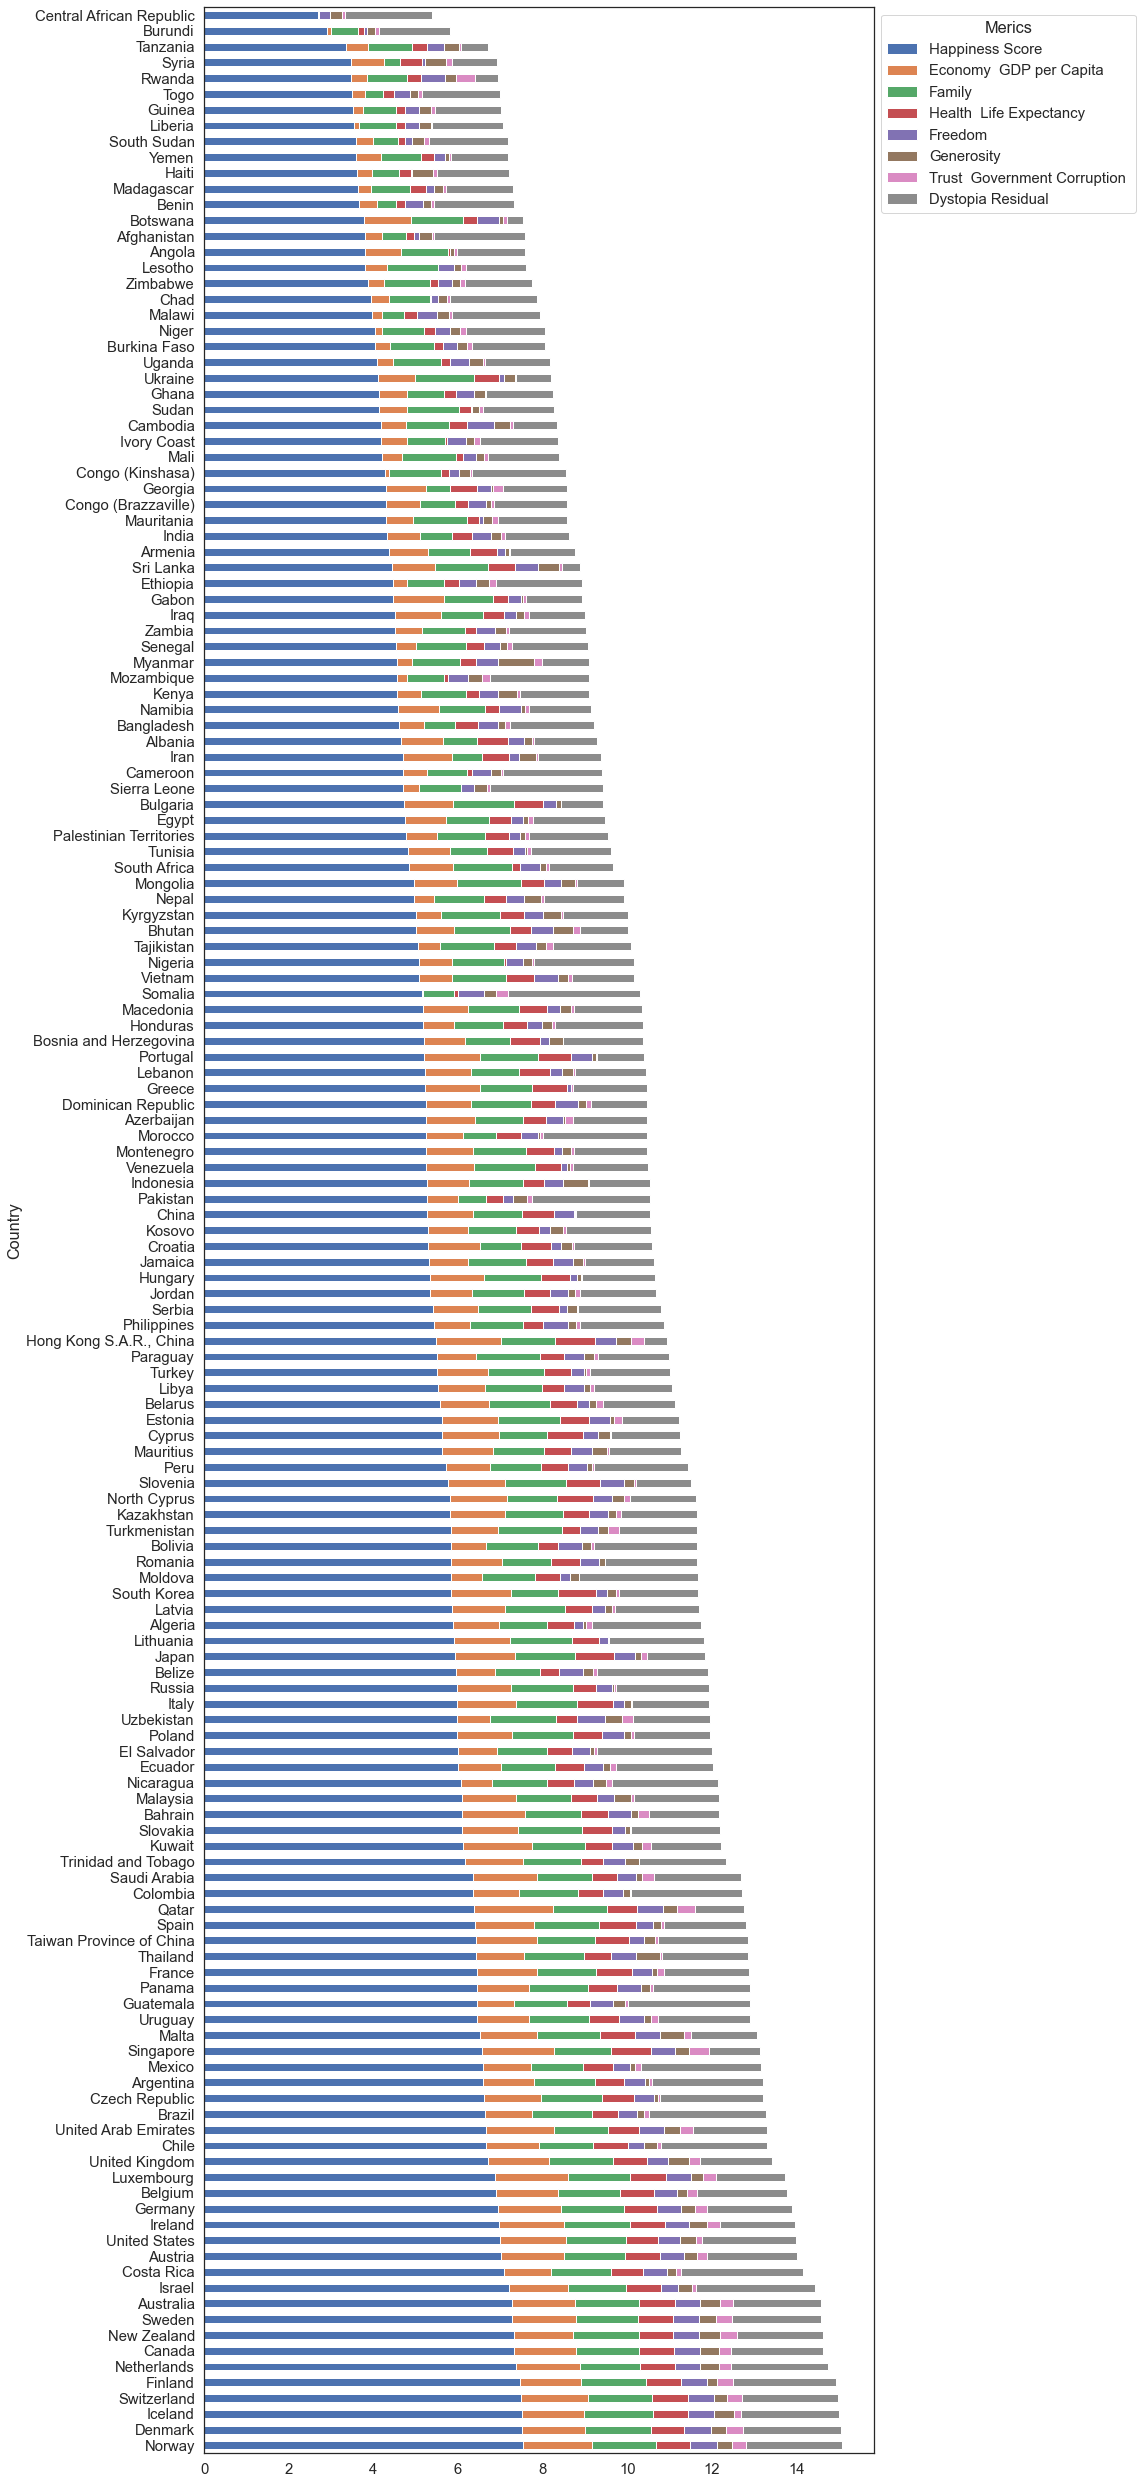

In [59]:
report_final = report_df.drop(["Happiness Rank","Whisker high","Whisker low"], axis = 1)
report_final.index = report_final.Country
sns.set_style("white")
report_final.plot(kind = "barh", stacked=True, figsize=(12, 45))
plt.legend(title='Merics', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()